#Each row has atmost 1 error or none
#Oulier has only outliers and no anamolies
#Missing value has only missing values
#Delivery fee depends on distance,day(weekend),time of the day (it depends linearly) on each of gthe three branches
#if the customer is loyal i.e 1...They have 50% discount on the delivery fee
#Djistra helps in finding the shortest distance between the nodes
#find distanceKM based on lat and long
#ordertype and time should match
#order items errors might be,but there are no errors in the count

In [1]:
#Basic scientific python libs
import pandas as pd
import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )


In [2]:
dirty_data = pd.read_csv("Group026_dirty_data.csv",parse_dates=['date'])
dirty_data.tail()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
495,ORDA07485,3/04/2018,11:02:32,Breakfast,BK,"[('Cereal', 5), ('Eggs', 10)]",325.00,-37.812534,144.987898,0,5.487,9.589700
496,ORDY10623,2018-23-01,8:40:33,Breakfast,TP,"[('Eggs', 7), ('Coffee', 5), ('Pancake', 5)]",312.75,-37.819076,144.954181,0,8.404,10.910748
497,ORDI09989,15/04/2018,11:22:49,Breakfast,NS,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)...",495.00,-37.807071,144.971266,0,11.914,13.696915
498,ORDJ02851,9/12/2018,19:19:26,Dinner,TP,"[('Pasta', 6), ('Salmon', 8), ('Fish&Chips', 6...",1081.00,-37.809434,144.972635,0,8.278,14.944317
499,ORDX05125,19/12/2018,19:39:43,Dinner,BK,"[('Fish&Chips', 7), ('Shrimp', 4)]",461.00,-37.821094,144.954957,0,8.599,15.358558


In [3]:

dirty_data.describe(include=['O'])
#dirty_data.head(10)

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,295,72,3,6,497
top,ORDZ01710,2/04/2018,10:42:15,Breakfast,NS,"[('Shrimp', 3), ('Salmon', 3)]"
freq,1,6,12,188,158,2


In [4]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [5]:
dirty_data.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,295,72,3,6,497
top,ORDZ01710,2/04/2018,10:42:15,Breakfast,NS,"[('Shrimp', 3), ('Salmon', 3)]"
freq,1,6,12,188,158,2


#### Three branch name consistensy

In [6]:
dirty_data.branch_code.value_counts()

NS    158
BK    155
TP    154
ns     13
bk     11
tp      9
Name: branch_code, dtype: int64

In [7]:
dirty_data.branch_code.replace({"bk": "BK", "tp": "TP", "ns":"NS"}, inplace=True)

In [8]:
dirty_data.branch_code.value_counts()

NS    171
BK    166
TP    163
Name: branch_code, dtype: int64

In [9]:
dirty_data.order_type.value_counts()

Breakfast    188
Lunch        158
Dinner       154
Name: order_type, dtype: int64

In [10]:
dirty_data.rename(columns={'customerHasloyalty?':'customerHasloyalty'},inplace=True)
dirty_data.customerHasloyalty.value_counts()

0    437
1     63
Name: customerHasloyalty, dtype: int64

In [11]:
dirty_data.dtypes

order_id                    object
date                        object
time                        object
order_type                  object
branch_code                 object
order_items                 object
order_price                float64
customer_lat               float64
customer_lon               float64
customerHasloyalty           int64
distance_to_customer_KM    float64
delivery_fee               float64
dtype: object

In [12]:



#dirty_data['time'] = pd.to_datetime(dirty_data['time']) 


#a. Breakfast - served during morning (8am - 12pm),
#b. Lunch - served during afternoon (12:00:01pm - 4pm)
#c. Dinner - served during evening (4:00:01pm - 8pm)

#### time==Order_type

In [13]:
#df.assign(temp_f
index = pd.DatetimeIndex(dirty_data['time'].copy())
Break_fast=dirty_data.iloc[index.indexer_between_time('08:00:00','12:00:00')]
Break_fast.iloc[1:,3]='Breakfast'
Lunch=dirty_data.iloc[index.indexer_between_time('12:00:01','16:00:00')]
Lunch.iloc[1:,3]='Lunch'
Dinner=dirty_data.iloc[index.indexer_between_time('16:00:01','20:00:00')]
Dinner.iloc[1:,3]='Dinner'
data1=pd.concat([Break_fast,Lunch,Dinner],axis=0)
# data1.reset_index(drop=True,inplace=True)
data1['order_type'].value_counts()
data1

C:\Users\joset\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
8,ORDX09318,14/02/2018,9:21:07,Breakfast,BK,"[('Cereal', 10), ('Eggs', 4), ('Coffee', 5), (...",529.50,-37.801067,144.921096,0,11.382,16.788363
10,ORDI04949,18/01/2018,8:30:25,Breakfast,NS,"[('Eggs', 10), ('Coffee', 4), ('Cereal', 2)]",292.00,-37.805928,144.932063,1,10.201,7.334730
14,ORDK02045,8/03/2018,10:11:49,Breakfast,BK,"[('Cereal', 7), ('Eggs', 2)]",191.00,-37.817030,144.951840,0,9.918,14.861218
15,ORDJ00485,13/04/2018,11:22:49,Breakfast,TP,"[('Cereal', 1), ('Eggs', 8), ('Coffee', 2)]",212.00,-37.802886,144.950820,0,4.546,12.153040
16,ORDA10507,3/02/2018,9:00:50,Breakfast,BK,"[('Eggs', 10), ('Coffee', 6), ('Pancake', 10)]",507.50,-37.823188,144.960796,0,8.420,15.913213
19,ORDX07607,3/04/2018,11:02:32,Breakfast,BK,"[('Cereal', 8), ('Eggs', 6), ('Pancake', 6), (...",468.00,-37.813228,144.990577,1,5.267,10.108936
21,ORDI02646,15/01/2018,8:20:16,Breakfast,NS,"[('Cereal', 2), ('Coffee', 4), ('Eggs', 3), ('...",283.50,-37.818030,144.949551,1,9.574,6.988279
22,ORDB03292,25/04/2018,11:43:05,Breakfast,TP,"[('Pancake', 10), ('Burger', 6), ('Eggs', 1), ...",420.50,-37.818770,144.953482,0,8.498,10.743323
23,ORDC05013,24/04/2018,11:43:05,Breakfast,NS,"[('Eggs', 4), ('Coffee', 7)]",140.50,-37.801409,145.002055,0,9.227,14.130603
24,ORDB06600,5/02/2018,9:10:59,Breakfast,TP,"[('Eggs', 5), ('Coffee', 4), ('Cereal', 1), ('...",306.50,144.986815,-37.824284,0,9.037,11.491135


In [14]:
import itertools
import re
outlier_data = pd.read_csv("Group026_outlier_data.csv")
outlier_data['order_items']
Breakfast = outlier_data[outlier_data['order_type'].isin(['Breakfast' ])]
Lunch=outlier_data[outlier_data['order_type'].isin(['Lunch' ])]
Dinner=outlier_data[outlier_data['order_type'].isin(['Dinner' ])]
Breakfast_list=[]
Lunch_list=[]
Dinner_list=[]
for row in Breakfast['order_items'].iteritems():
    a=re.findall(r"\'(.*?)\'",row[1])
    for i in a : 
            Breakfast_list.append(i) 
for row in Lunch['order_items'].iteritems():
    a=re.findall(r"\'(.*?)\'",row[1])
    for m in a : 
            Lunch_list.append(m)
for row in Dinner['order_items'].iteritems():
    a=re.findall(r"\'(.*?)\'",row[1])
    for n in a : 
            Dinner_list.append(n)
            
print(set(Breakfast_list))
print(set(Lunch_list))
print(set(Dinner_list))



{'Cereal', 'Pancake', 'Coffee', 'Eggs'}
{'Salad', 'Chicken', 'Burger', 'Fries', 'Steak'}
{'Salmon', 'Fish&Chips', 'Shrimp', 'Pasta'}


In [15]:
import ast
data=[]
for i in data1['order_items']:
    res = ast.literal_eval(i)
    data.append(dict(res))
df = pd.DataFrame()
df['C'] = [i for i in data]       
data1.describe(include=['O'])
data1.assign(order_items=df['C'])
#data1['order_items'].to_dict('records')
data1.dtypes

order_id                    object
date                        object
time                        object
order_type                  object
branch_code                 object
order_items                 object
order_price                float64
customer_lat               float64
customer_lon               float64
customerHasloyalty           int64
distance_to_customer_KM    float64
delivery_fee               float64
dtype: object

In [16]:
import ast

for i in data1['order_items']:
    a=list(ast.literal_eval(i))
    print(a)

[('Cereal', 10), ('Eggs', 4), ('Coffee', 5), ('Pancake', 8)]
[('Eggs', 10), ('Coffee', 4), ('Cereal', 2)]
[('Cereal', 7), ('Eggs', 2)]
[('Cereal', 1), ('Eggs', 8), ('Coffee', 2)]
[('Eggs', 10), ('Coffee', 6), ('Pancake', 10)]
[('Cereal', 8), ('Eggs', 6), ('Pancake', 6), ('Coffee', 3)]
[('Cereal', 2), ('Coffee', 4), ('Eggs', 3), ('Pancake', 6)]
[('Pancake', 10), ('Burger', 6), ('Eggs', 1), ('Coffee', 4)]
[('Eggs', 4), ('Coffee', 7)]
[('Eggs', 5), ('Coffee', 4), ('Cereal', 1), ('Pancake', 6)]
[('Coffee', 8), ('Eggs', 7)]
[('Pancake', 9), ('Coffee', 3)]
[('Pancake', 5), ('Eggs', 6), ('Cereal', 3), ('Coffee', 3)]
[('Eggs', 10), ('Pancake', 7), ('Cereal', 1)]
[('Coffee', 10), ('Eggs', 8), ('Cereal', 6)]
[('Coffee', 1), ('Cereal', 3)]
[('Pancake', 7), ('Coffee', 10), ('Cereal', 2)]
[('Cereal', 8), ('Pancake', 2)]
[('Eggs', 3), ('Cereal', 5), ('Coffee', 8)]
[('Coffee', 10), ('Eggs', 8), ('Pancake', 8), ('Cereal', 9)]
[('Coffee', 4), ('Eggs', 5), ('Cereal', 9)]
[('Coffee', 9), ('Cereal', 4), (

[('Cereal', 10), ('Coffee', 6), ('Eggs', 9), ('Pancake', 3)]
[('Cereal', 3), ('Coffee', 2), ('Pancake', 9), ('Eggs', 9)]
[('Pancake', 10), ('Coffee', 8), ('Eggs', 3), ('Cereal', 7)]
[('Cereal', 3), ('Coffee', 9), ('Pancake', 2)]
[('Coffee', 8), ('Cereal', 1), ('Eggs', 7)]
[('Coffee', 6), ('Cereal', 4), ('Pancake', 4)]
[('Cereal', 5), ('Eggs', 10)]
[('Eggs', 7), ('Coffee', 5), ('Pancake', 5)]
[('Cereal', 7), ('Coffee', 10), ('Pancake', 4), ('Eggs', 8)]
[('Chicken', 5), ('Fries', 5), ('Burger', 5), ('Steak', 4), ('Salad', 4)]
[('Burger', 3), ('Steak', 10), ('Chicken', 7)]
[('Fish&Chips', 4), ('Fries', 8), ('Burger', 4), ('Steak', 7)]
[('Fries', 9), ('Chicken', 2), ('Salad', 8)]
[('Fries', 5), ('Burger', 2), ('Salad', 9)]
[('Burger', 6), ('Fish&Chips', 8), ('Fries', 5)]
[('Chicken', 8), ('Salad', 7), ('Burger', 1), ('Steak', 3), ('Fries', 5)]
[('Fries', 3), ('Burger', 3), ('Steak', 2), ('Salad', 9), ('Chicken', 8)]
[('Fries', 6), ('Chicken', 3), ('Salad', 2)]
[('Fries', 10), ('Chicken', 5

## 

In [17]:
\

In [18]:
# a = np.array([[3,1], [1,2]])
# b = np.array([9,8])
# x = np.linalg.solve(a, b)
# x
# #array([2.,  3.])

In [19]:
from datetime import datetime


#### convert date to yyyy-mm-dd

In [20]:
data1.dtypes

order_id                    object
date                        object
time                        object
order_type                  object
branch_code                 object
order_items                 object
order_price                float64
customer_lat               float64
customer_lon               float64
customerHasloyalty           int64
distance_to_customer_KM    float64
delivery_fee               float64
dtype: object

In [21]:
#data1['date']=pd.to_datetime(data1['date'],format="%y-%m-%d",errors='coerce')
data1['date']

8      14/02/2018
10     18/01/2018
14      8/03/2018
15     13/04/2018
16      3/02/2018
19      3/04/2018
21     15/01/2018
22     25/04/2018
23     24/04/2018
24      5/02/2018
27      5/04/2018
30     21/02/2018
31     26/03/2018
32      9/03/2018
33     24/03/2018
35      3/03/2018
40     2018-28-02
44     2018-21-04
45     13/01/2018
46      7/04/2018
47     12/02/2018
49     30/01/2018
54     12/02/2018
56      2/05/2018
60     17/01/2018
65     25/02/2018
66     12/02/2018
70     22/02/2018
71     10/02/2018
77     22/03/2018
          ...    
400    13/12/2018
404    30/09/2018
405     1/10/2018
407    17/10/2018
411    16/09/2018
414     8/10/2018
415    22/09/2018
416    18/11/2018
420    11/11/2018
424    16/12/2018
427     5/10/2018
428    30/09/2018
432    18/11/2018
433    31/12/2018
437     9/10/2018
447    28/11/2018
453     8/09/2018
458    11/12/2018
462    23/10/2018
463     6/12/2018
471    15/09/2018
472     8/12/2018
476    24/12/2018
480    25/10/2018
481     4/

In [22]:

data1['date'] = pd.to_datetime(data1['date'], format='%Y-%m-%d',errors ='ignore')
data1['date'].dtypes

dtype('O')

In [23]:



# d1 = pd.to_datetime(data1['date'], format='%d-%m-%Y', errors='ignore')
# d2 = pd.to_datetime(data1['date'], format='%Y-%m-%d', errors='ignore')
# #2.dtylesd2.dt.strftime('%Y-%m-%d')

# data1['date'] = d1.combine_first(d2)
# data1['date']= pd.to_datetime(data1['date'], format='%Y-%m-%d', errors='ignore')
# data1['date']



#### Fetch week of the day for linear equation


In [24]:
pip install osmnx


The following command must be run outside of the IPython shell:

    $ pip install osmnx

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [25]:
dirty_data.head(30)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
0,ORDK08089,18/10/2018,17:38:01,Dinner,BK,"[('Pasta', 9), ('Salmon', 1), ('Fish&Chips', 1...",431.5,-37.823772,144.982539,0,6.835,13.994718
1,ORDI05679,6/08/2018,15:05:54,Lunch,NS,"[('Chicken', 5), ('Fries', 5), ('Burger', 5), ...",623.8,-37.805138,144.964186,0,7.068,12.683499
2,ORDJ09514,2018-30-06,13:54:55,Lunch,TP,"[('Burger', 3), ('Steak', 10), ('Chicken', 7)]",767.0,-37.805550,144.935397,0,10.742,14.913298
3,ORDZ06702,15/11/2018,18:28:43,Dinner,BK,"[('Shrimp', 3), ('Fish&Chips', 8), ('Salmon', 5)]",647.0,-37.823825,144.959297,0,9.960,15.393485
4,ORDJ03750,8/11/2018,18:18:35,Dinner,TP,"[('Pasta', 1), ('Salmon', 1)]",68.5,-37.813677,145.012955,0,12.277,15.217138
5,ORDZ11067,22/10/2018,17:48:10,Dinner,NS,"[('Pasta', 4), ('Fish&Chips', 3), ('Salmon', 6)]",461.0,37.819112,144.964408,0,8.728,15.047563
6,ORDA08922,18/08/2018,15:36:20,Lunch,BK,"[('Fish&Chips', 4), ('Fries', 8), ('Burger', 4...",603.8,-37.812195,144.970521,0,7.049,15.045188
7,ORDJ05837,8/07/2018,14:15:12,Lunch,TP,"[('Fries', 9), ('Chicken', 2), ('Salad', 8)]",309.6,-37.808424,144.976037,0,9.217,14.190419
8,ORDX09318,14/02/2018,9:21:07,Breakfast,BK,"[('Cereal', 10), ('Eggs', 4), ('Coffee', 5), (...",529.5,-37.801067,144.921096,0,11.382,16.788363
9,ORDB05332,20/12/2018,19:39:43,Dinner,TP,"[('Salmon', 8), ('Shrimp', 7)]",706.0,-37.812967,144.933662,0,11.367,15.598569


In [26]:
breakie = set(Breakfast_list)
lunch = set(Lunch_list)
dinner = set(Dinner_list)

In [27]:
for index, row in data1.iterrows():
    temp = row['order_items']
    temp = temp[1:-1]
    typ = row['order_type']
    #temp=re.findall(r"\'(.*?)\'",row['order_items'])
    #temp = temp.split(',')
    #print(temp)
    temp = re.findall(r'\(\'\w*&?\w*\', \d*\)', temp)
    #print(temp)
    error = []
    if typ == 'Breakfast':
        for i in temp:
            #print(i[1:-1].split(',')[0])
            if i[1:-1].split(',')[0].strip()[1:-1] not in breakie:
                #print(i,i[1:-1].split(',')[0].strip(), index, type)
                error.append(i)
                #continue
    elif typ == 'Dinner':
        for i in temp:
            if i[1:-1].split(',')[0].strip()[1:-1] not in dinner:
                #print(i,i[1:-1].split(',')[0].strip() ,index, type)
                error.append(i)
              
                #continue
    elif typ == 'Lunch':
        for i in temp:
            if i[1:-1].split(',')[0].strip()[1:-1] not in lunch:
                #print(i,i[1:-1].split(',')[0].strip(), index, type)
                error.append(i)
                #continue
    for err in error:
        print('Error: ', temp, typ, index)
        temp.remove(err)
        print('Corrected: ', temp, typ)
        data1.at[index, 'order_items'] = str(temp)
        
    error = []
    
   # else:
        #print(temp)

Error:  ["('Pancake', 10)", "('Burger', 6)", "('Eggs', 1)", "('Coffee', 4)"] Breakfast 22
Corrected:  ["('Pancake', 10)", "('Eggs', 1)", "('Coffee', 4)"] Breakfast
Error:  ["('Burger', 3)", "('Coffee', 8)"] Breakfast 56
Corrected:  ["('Coffee', 8)"] Breakfast
Error:  ["('Pancake', 9)", "('Shrimp', 7)"] Breakfast 66
Corrected:  ["('Pancake', 9)"] Breakfast
Error:  ["('Salmon', 4)", "('Coffee', 5)"] Breakfast 133
Corrected:  ["('Coffee', 5)"] Breakfast
Error:  ["('Cereal', 1)", "('Pancake', 9)", "('Fries', 2)"] Breakfast 167
Corrected:  ["('Cereal', 1)", "('Pancake', 9)"] Breakfast
Error:  ["('Coffee', 7)", "('Pasta', 2)", "('Pancake', 1)"] Breakfast 220
Corrected:  ["('Coffee', 7)", "('Pancake', 1)"] Breakfast
Error:  ["('Coffee', 10)", "('Salmon', 7)"] Breakfast 265
Corrected:  ["('Coffee', 10)"] Breakfast
Error:  ["('Fries', 4)", "('Cereal', 5)"] Breakfast 278
Corrected:  ["('Cereal', 5)"] Breakfast
Error:  ["('Salad', 1)", "('Pancake', 3)", "('Coffee', 7)"] Breakfast 341
Corrected:  

In [28]:

{'Pancake', 'Coffee', 'Cereal', 'Eggs'}
{'Fries', 'Steak', 'Salad', 'Burger', 'Chicken'}
{'Fish&Chips', 'Salmon', 'Pasta', 'Shrimp'}

{'Fish&Chips', 'Pasta', 'Salmon', 'Shrimp'}

In [29]:
dirty_data.loc[22]

order_id                                                           ORDB03292
date                                                              25/04/2018
time                                                                11:43:05
order_type                                                         Breakfast
branch_code                                                               TP
order_items                [('Pancake', 10), ('Burger', 6), ('Eggs', 1), ...
order_price                                                            420.5
customer_lat                                                        -37.8188
customer_lon                                                         144.953
customerHasloyalty                                                         0
distance_to_customer_KM                                                8.498
delivery_fee                                                         10.7433
Name: 22, dtype: object

In [30]:
data1.loc[22]

order_id                                                           ORDB03292
date                                                              25/04/2018
time                                                                11:43:05
order_type                                                         Breakfast
branch_code                                                               TP
order_items                ["('Pancake', 10)", "('Eggs', 1)", "('Coffee',...
order_price                                                            420.5
customer_lat                                                        -37.8188
customer_lon                                                         144.953
customerHasloyalty                                                         0
distance_to_customer_KM                                                8.498
delivery_fee                                                         10.7433
Name: 22, dtype: object

In [31]:
ed = pd.read_csv('edges.csv')
nodes=pd.read_csv('nodes.csv')

In [32]:
#count = 0
lat=list(nodes['lat'])
#print(len(lat))
#print(type(dirty_new['customer_lat']))
for index, row in data1.iterrows():
    if row['customer_lat'] not in lat:
        #print(str(row['customer_lat']))
        code=re.search(r'(1|3).*',str(row['customer_lat'])).group(1)
        if code=='3':
            data1.at[index,'customer_lat']=-data1.at[index,'customer_lat']
           # print(dirty_new['customer_lat'])
        elif code=='1':
            temp=row['customer_lat']
            #print(temp,'temp')
            data1.at[index,'customer_lat']=data1.at[index,'customer_lon']
            data1.at[index,'customer_lon']=temp

In [33]:
import networkx as nx

bk = int(nodes.loc[(nodes['lat'] == -37.8158343) & (nodes['lon'] == 145.04645)]['node'])
ns = int(nodes.loc[(nodes['lat'] == -37.7738026)]['node'])
tp = int(nodes.loc[(nodes['lat'] == -37.8618349)]['node'])
#print(ns, bk, tp)

network = nx.Graph()

network.add_nodes_from([ns, bk, tp])

for index, row in ed.iterrows():
    #print(row['distance(m)'])
    network.add_edge(row['u'], row['v'], length = row['distance(m)'])

In [34]:
for index, row in data1.iterrows():
    #print(index)
    source = (int(nodes.loc[(nodes['lat'] == row['customer_lat']) & (nodes['lon'] == row['customer_lon'])]['node']))
    #print(source)
    if row['branch_code'] == 'BK':
        #print('BK')
        dist = (nx.dijkstra_path_length(network, source, bk, weight='length'))/1000
        if dist != round(float(row['distance_to_customer_KM']),3):
            print('Error: ', float(row['distance_to_customer_KM']), index)
            print('Corrected: ', dist)
            data1.at[index, 'distance_to_customer_KM'] = dist
    elif row['branch_code'] == 'NS':
        #print(row['distance_to_customer_KM'])
        dist = (nx.dijkstra_path_length(network, source, ns, weight='length'))/1000
        if dist != round(float(row['distance_to_customer_KM']),3):
            print('Error: ', float(row['distance_to_customer_KM']), index)
            print('Corrected: ', dist)
            data1.at[index, 'distance_to_customer_KM'] = dist
    elif row['branch_code'] == 'TP':
        #print('TP')
        dist = (nx.dijkstra_path_length(network, source, tp, weight='length'))/1000
        if dist != round(float(row['distance_to_customer_KM']),3):
            print('Error: ', float(row['distance_to_customer_KM']), index)
            print('Corrected: ', dist)
            data1.at[index, 'distance_to_customer_KM'] = dist
        
#print(count)

Error:  4.546 15
Corrected:  9.95
Error:  10.222000000000001 35
Corrected:  8.096
Error:  4.58 109
Corrected:  9.272
Error:  8.884 127
Corrected:  9.377
Error:  7.817 152
Corrected:  8.495
Error:  7.352 155
Corrected:  6.472
Error:  7.678 195
Corrected:  6.821
Error:  11.433 199
Corrected:  6.86
Error:  8.995 207
Corrected:  10.763
Error:  8.46 244
Corrected:  6.505
Error:  9.782 264
Corrected:  9.446
Error:  8.898 279
Corrected:  9.112
Error:  7.539 316
Corrected:  6.963
Error:  7.796 325
Corrected:  8.602
Error:  6.83 342
Corrected:  10.143
Error:  8.046 386
Corrected:  9.244
Error:  8.135 388
Corrected:  8.301
Error:  8.53 397
Corrected:  8.369
Error:  11.095999999999998 406
Corrected:  8.61
Error:  8.34 412
Corrected:  8.832
Error:  4.747 421
Corrected:  9.48
Error:  9.568999999999999 438
Corrected:  8.705
Error:  5.664 444
Corrected:  7.332
Error:  8.719 446
Corrected:  7.374
Error:  9.91 488
Corrected:  7.447
Error:  11.914000000000001 497
Corrected:  6.898
Error:  4.568000000000

In [35]:
data1.loc[59]

order_id                                                           ORDJ03851
date                                                              19/07/2018
time                                                                14:35:29
order_type                                                             Lunch
branch_code                                                               TP
order_items                [('Salad', 1), ('Chicken', 3), ('Steak', 3), (...
order_price                                                            365.2
customer_lat                                                        -37.8095
customer_lon                                                          145.01
customerHasloyalty                                                         0
distance_to_customer_KM                                               12.256
delivery_fee                                                         15.2459
Name: 59, dtype: object

In [36]:
dirty_data.loc[59]

order_id                                                           ORDJ03851
date                                                              19/07/2018
time                                                                14:35:29
order_type                                                             Lunch
branch_code                                                               TP
order_items                [('Salad', 1), ('Chicken', 3), ('Steak', 3), (...
order_price                                                            365.2
customer_lat                                                        -37.8095
customer_lon                                                          145.01
customerHasloyalty                                                         0
distance_to_customer_KM                                                8.185
delivery_fee                                                         15.2459
Name: 59, dtype: object

In [37]:
outlier_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY02448,2018-04-05,11:02:32,Breakfast,TP,"[('Coffee', 1), ('Pancake', 8), ('Cereal', 4)]",285.5,-37.801972,144.993970,0,11.272,13.491511
1,ORDK02456,2018-06-09,13:14:21,Lunch,BK,"[('Steak', 5), ('Fries', 9), ('Salad', 10), ('...",660.0,-37.804342,144.948859,0,8.880,17.305048
2,ORDX05363,2018-12-29,20:00:00,Dinner,BK,"[('Pasta', 5), ('Fish&Chips', 2), ('Shrimp', 2...",479.5,-37.815720,144.937145,0,10.049,19.947093
3,ORDI01233,2018-06-30,13:54:55,Lunch,NS,"[('Fries', 2), ('Chicken', 4)]",152.0,-37.818778,144.952849,0,10.101,17.683454
4,ORDK10204,2018-07-23,14:45:38,Lunch,BK,"[('Steak', 2), ('Chicken', 6), ('Burger', 9)]",561.0,-37.808594,144.948182,0,8.942,15.583234


In [38]:
break_com = []
dinner_com = []
lunch_com = []
for index, row in outlier_data.iterrows():
    temp = row['order_items']
    temp = temp[1:-1]
    typ = row['order_type']
    temp = re.findall(r'\(\'\w*&?\w*\', \d*\)', temp)
    if typ == 'Breakfast' and len(temp) == len(set(breakie)):
        break_inner = []
        for i in temp:
            x = i[1:-1].split(',')[0].strip()[1:-1]
            qty = int(i[1:-1].split(',')[1].strip())
            #print(x, qty)
            break_inner.append(str(x)+ " : " + str(qty))
            #print(break_inner)
        break_inner.append(row['order_price'])
        break_com.append(break_inner)
        #break_com.append(index)
        #break_inner = []
    elif typ == 'Dinner' and len(temp) == len(set(dinner)):
        #print(temp)
        dinner_inner = []
        for i in temp:
            x = i[1:-1].split(',')[0].strip()[1:-1]
            qty = int(i[1:-1].split(',')[1].strip())
            #print(x, qty)
            dinner_inner.append(str(x)+ " : " + str(qty))
            #print(dinner_inner)
        dinner_inner.append(row['order_price'])
        dinner_com.append(dinner_inner)
        #dinner_com.append(index)
        
        #dinner_inner = []
    elif typ == 'Lunch' and len(temp) == len(set(lunch)):
        lunch_inner = []
        for i in temp:
            x = i[1:-1].split(',')[0].strip()[1:-1]
            qty = int(i[1:-1].split(',')[1].strip())  
            #print(x, qty)
            lunch_inner.append(str(x)+ " : " + str(qty))
            #print(lunch_inner)
        lunch_inner.append(row['order_price'])
        lunch_com.append(lunch_inner)
        #
        #
        #lunch_com.append(index)
        #lunch_inner = []
dinner_com

[['Pasta : 5', 'Fish&Chips : 2', 'Shrimp : 2', 'Salmon : 4', 479.5],
 ['Shrimp : 9', 'Fish&Chips : 3', 'Salmon : 2', 'Pasta : 10', 948.0],
 ['Pasta : 6', 'Shrimp : 6', 'Salmon : 10', 'Fish&Chips : 7', 1144.0],
 ['Shrimp : 2', 'Pasta : 2', 'Salmon : 4', 'Fish&Chips : 9', 642.0],
 ['Salmon : 10', 'Shrimp : 8', 'Fish&Chips : 8', 'Pasta : 5', 1259.5],
 ['Fish&Chips : 7', 'Pasta : 10', 'Shrimp : 9', 'Salmon : 10', 1416.0],
 ['Fish&Chips : 3', 'Salmon : 7', 'Pasta : 2', 'Shrimp : 4', 663.0],
 ['Fish&Chips : 9', 'Salmon : 1', 'Shrimp : 5', 'Pasta : 8', 846.0],
 ['Salmon : 9', 'Shrimp : 7', 'Fish&Chips : 2', 'Pasta : 4', 927.0],
 ['Fish&Chips : 2', 'Pasta : 4', 'Shrimp : 2', 'Salmon : 5', 493.0],
 ['Shrimp : 5', 'Fish&Chips : 9', 'Salmon : 7', 'Pasta : 9', 1119.5],
 ['Salmon : 2', 'Fish&Chips : 3', 'Shrimp : 5', 'Pasta : 4', 567.0],
 ['Shrimp : 10', 'Fish&Chips : 4', 'Salmon : 9', 'Pasta : 9', 1296.5],
 ['Salmon : 4', 'Shrimp : 4', 'Pasta : 7', 'Fish&Chips : 7', 817.5],
 ['Pasta : 5', 'Fish&Ch

In [39]:
dinner

{'Fish&Chips', 'Pasta', 'Salmon', 'Shrimp'}

In [40]:
breakfast_lin = break_com[:4]
breakfast_lin

[['Coffee : 7', 'Pancake : 4', 'Eggs : 8', 'Cereal : 4', 409.5],
 ['Cereal : 4', 'Coffee : 9', 'Eggs : 2', 'Pancake : 5', 316.75],
 ['Coffee : 1', 'Pancake : 2', 'Cereal : 2', 'Eggs : 5', 208.0],
 ['Coffee : 9', 'Eggs : 5', 'Pancake : 5', 'Cereal : 8', 466.75]]

In [41]:
coffee = 0
pan = 0
egg = 0
cer = 0
a = []
b = []
for i in breakfast_lin:
    for j in i:
        #print(j)
        if isinstance(j, float):
            b.append(j)
        else:
            qty = int(j.split(':')[1].strip())
            if str(j.split(':')[0].strip()) == 'Coffee':
                coffee += qty
            elif str(j.split(':')[0].strip()) == 'Pancake':
                pan += qty
            elif str(j.split(':')[0].strip()) == 'Eggs':
                egg += qty
            elif str(j.split(':')[0].strip()) == 'Cereal':
                cer += qty
            
    a.append([coffee, pan, egg, cer])
    coffee = 0
    pan = 0
    egg = 0
    cer = 0
a
b

[409.5, 316.75, 208.0, 466.75]

In [42]:
import numpy as np

a = np.array(a)
b = np.array(b)

break_indi = (np.linalg.solve(a,b))
break_indi_item = ['Coffee', 'Pancake', 'Eggs', 'Cereal']

In [43]:
lunch_lin = lunch_com[:5]
lunch_lin

[['Burger : 7', 'Fries : 6', 'Chicken : 2', 'Steak : 10', 'Salad : 7', 923.4],
 ['Chicken : 3', 'Salad : 5', 'Burger : 8', 'Steak : 10', 'Fries : 7', 964.0],
 ['Burger : 2', 'Fries : 10', 'Steak : 5', 'Salad : 2', 'Chicken : 7', 665.4],
 ['Salad : 3', 'Burger : 6', 'Chicken : 6', 'Steak : 10', 'Fries : 10', 999.6],
 ['Fries : 3', 'Steak : 7', 'Chicken : 1', 'Salad : 4', 'Burger : 7', 668.8]]

In [44]:
bur = 0
fri = 0
chi = 0
ste = 0
sal = 0
a = []
b = []
for i in lunch_lin:
    for j in i:
        #print(j)
        if isinstance(j, float):
            b.append(j)
        else:
            qty = int(j.split(':')[1].strip())
            #print(j.split(':')[0].strip())
            if str(j.split(':')[0].strip()) == 'Burger':
                #print("bg")
                bur += qty
                #print(bur)
            elif str(j.split(':')[0].strip()) == 'Fries':
                fri += qty
            elif str(j.split(':')[0].strip()) == 'Chicken':
                chi += qty
            elif str(j.split(':')[0].strip()) == 'Steak':
                ste += qty
            elif str(j.split(':')[0].strip()) == 'Salad':
                sal += qty
    a.append([bur, fri, chi, ste, sal])
    bur = 0
    fri = 0
    chi = 0
    ste = 0
    sal = 0
a
#b

[[7, 6, 2, 10, 7],
 [8, 7, 3, 10, 5],
 [2, 10, 7, 5, 2],
 [6, 10, 6, 10, 3],
 [7, 3, 1, 7, 4]]

In [45]:
a = np.array(a)
b = np.array(b)

lunch_indi = (np.linalg.solve(a,b))
lunch_indi_item = ['Burger', 'Fries', 'Chicken', 'Steak', 'Salad']

In [46]:
dinner_lin = dinner_com[:4]
dinner_lin

[['Pasta : 5', 'Fish&Chips : 2', 'Shrimp : 2', 'Salmon : 4', 479.5],
 ['Shrimp : 9', 'Fish&Chips : 3', 'Salmon : 2', 'Pasta : 10', 948.0],
 ['Pasta : 6', 'Shrimp : 6', 'Salmon : 10', 'Fish&Chips : 7', 1144.0],
 ['Shrimp : 2', 'Pasta : 2', 'Salmon : 4', 'Fish&Chips : 9', 642.0]]

In [47]:
pas = 0
fis = 0
shi = 0
salm = 0
a = []
b = []
for i in dinner_lin:
    for j in i:
        #print(j)
        if isinstance(j, float):
            b.append(j)
        else:
            qty = int(j.split(':')[1].strip())
            #print(j.split(':')[0].strip())
            if str(j.split(':')[0].strip()) == 'Pasta':
                #print("bg")
                pas += qty
                #print(bur)
            elif str(j.split(':')[0].strip()) == 'Fish&Chips':
                fis += qty
            elif str(j.split(':')[0].strip()) == 'Shrimp':
                shi += qty
            elif str(j.split(':')[0].strip()) == 'Salmon':
                salm += qty
    a.append([pas, fis, shi, salm])
    pas = 0
    fis = 0
    shi = 0
    salm = 0
a
#b

[[5, 2, 2, 4], [10, 3, 9, 2], [6, 7, 6, 10], [2, 9, 2, 4]]

In [48]:
a = np.array(a)
b = np.array(b)

dinner_indi = (np.linalg.solve(a,b))
dinner_indi_item = ['Pasta', 'Fish&Chips', 'Shrimp', 'Salmon']

In [49]:
new_list_item = break_indi_item + lunch_indi_item + dinner_indi_item
new_list_item

['Coffee',
 'Pancake',
 'Eggs',
 'Cereal',
 'Burger',
 'Fries',
 'Chicken',
 'Steak',
 'Salad',
 'Pasta',
 'Fish&Chips',
 'Shrimp',
 'Salmon']

In [50]:
new_list_indi = list(break_indi) + list(lunch_indi) + list(dinner_indi)
new_list_indi

[7.499999999999992,
 24.250000000000014,
 21.999999999999996,
 21.0,
 30.999999999999986,
 12.000000000000052,
 31.999999999999932,
 45.00000000000001,
 17.199999999999985,
 27.5,
 34.99999999999999,
 54.0,
 41.0]

In [51]:
indi_price = dict(zip(new_list_item, new_list_indi))
indi_price

{'Coffee': 7.499999999999992,
 'Pancake': 24.250000000000014,
 'Eggs': 21.999999999999996,
 'Cereal': 21.0,
 'Burger': 30.999999999999986,
 'Fries': 12.000000000000052,
 'Chicken': 31.999999999999932,
 'Steak': 45.00000000000001,
 'Salad': 17.199999999999985,
 'Pasta': 27.5,
 'Fish&Chips': 34.99999999999999,
 'Shrimp': 54.0,
 'Salmon': 41.0}

In [52]:
for index, row in data1.iterrows():
    #temp = ""
    temp = row['order_items']
    #print(temp,'Zero')
    temp = temp[1:-1]
    #print(temp, 'First')
    typ = row['order_type']
    temp = re.findall(r'\(\'\w*&?\w*\', \d*\)', temp)
    ini_price = 0
    price = 0
    #print(temp)
    for i in temp:
        #print(type(i))
        qty = int(i.split(',')[1][:-1].strip())
        #qty = i[1]
        #print(qty)
        item = str(i.split(',')[0][2:-1].strip())
        #print(item)
        price = (indi_price[item] * qty)
        ini_price += price
    if round(ini_price, 2) != row['order_price']:
        #print(round(ini_price, 2), row['order_price'], index)
        data1.at[index, 'order_price'] = round(ini_price, 2)

In [53]:
dirty_data.loc[22]

order_id                                                           ORDB03292
date                                                              25/04/2018
time                                                                11:43:05
order_type                                                         Breakfast
branch_code                                                               TP
order_items                [('Pancake', 10), ('Burger', 6), ('Eggs', 1), ...
order_price                                                            420.5
customer_lat                                                        -37.8188
customer_lon                                                         144.953
customerHasloyalty                                                         0
distance_to_customer_KM                                                8.498
delivery_fee                                                         10.7433
Name: 22, dtype: object

In [55]:
data1.loc[22]

order_id                                                           ORDB03292
date                                                              25/04/2018
time                                                                11:43:05
order_type                                                         Breakfast
branch_code                                                               TP
order_items                ["('Pancake', 10)", "('Eggs', 1)", "('Coffee',...
order_price                                                            294.5
customer_lat                                                        -37.8188
customer_lon                                                         144.953
customerHasloyalty                                                         0
distance_to_customer_KM                                                8.498
delivery_fee                                                         10.7433
Name: 22, dtype: object

In [56]:
data1.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
8,ORDX09318,14/02/2018,9:21:07,Breakfast,BK,"[('Cereal', 10), ('Eggs', 4), ('Coffee', 5), (...",529.5,-37.801067,144.921096,0,11.382,16.788363
10,ORDI04949,18/01/2018,8:30:25,Breakfast,NS,"[('Eggs', 10), ('Coffee', 4), ('Cereal', 2)]",292.0,-37.805928,144.932063,1,10.201,7.334730
14,ORDK02045,8/03/2018,10:11:49,Breakfast,BK,"[('Cereal', 7), ('Eggs', 2)]",191.0,-37.817030,144.951840,0,9.918,14.861218
15,ORDJ00485,13/04/2018,11:22:49,Breakfast,TP,"[('Cereal', 1), ('Eggs', 8), ('Coffee', 2)]",212.0,-37.802886,144.950820,0,9.950,12.153040
16,ORDA10507,3/02/2018,9:00:50,Breakfast,BK,"[('Eggs', 10), ('Coffee', 6), ('Pancake', 10)]",507.5,-37.823188,144.960796,0,8.420,15.913213


In [72]:
a = data1.groupby('branch_code').count()
a

,order_id,date,time,order_type,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
branch_code,,,,,,,,,,,
BK,166,166,166,166,166,166,166,166,166,166,166
NS,171,171,171,171,171,171,171,171,171,171,171
TP,163,163,163,163,163,163,163,163,163,163,163


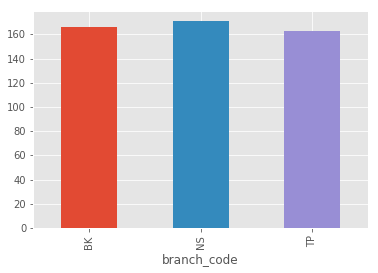

In [79]:
a['order_id'].plot.bar()

In [80]:
data1.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
8,ORDX09318,14/02/2018,9:21:07,Breakfast,BK,"[('Cereal', 10), ('Eggs', 4), ('Coffee', 5), (...",529.5,-37.801067,144.921096,0,11.382,16.788363
10,ORDI04949,18/01/2018,8:30:25,Breakfast,NS,"[('Eggs', 10), ('Coffee', 4), ('Cereal', 2)]",292.0,-37.805928,144.932063,1,10.201,7.334730
14,ORDK02045,8/03/2018,10:11:49,Breakfast,BK,"[('Cereal', 7), ('Eggs', 2)]",191.0,-37.817030,144.951840,0,9.918,14.861218
15,ORDJ00485,13/04/2018,11:22:49,Breakfast,TP,"[('Cereal', 1), ('Eggs', 8), ('Coffee', 2)]",212.0,-37.802886,144.950820,0,9.950,12.153040
16,ORDA10507,3/02/2018,9:00:50,Breakfast,BK,"[('Eggs', 10), ('Coffee', 6), ('Pancake', 10)]",507.5,-37.823188,144.960796,0,8.420,15.913213


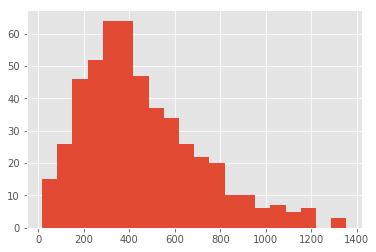

In [86]:
plt.hist(data1['order_price'], bins = 20)
plt.show()

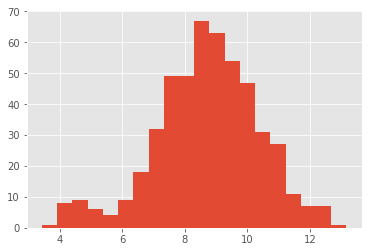

In [87]:
plt.hist(data1['distance_to_customer_KM'], bins = 20)
plt.show()

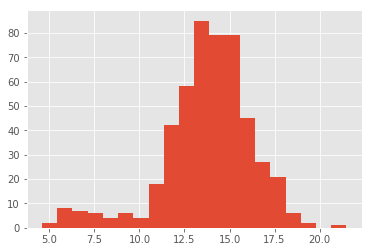

In [88]:
plt.hist(data1['delivery_fee'], bins = 20)
plt.show()

In [89]:
data1.corr()

,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee
order_price,1.000000,-0.050693,-0.005062,-0.084960,0.026246,0.229779
customer_lat,-0.050693,1.000000,-0.222211,-0.021501,0.078013,0.012182
customer_lon,-0.005062,-0.222211,1.000000,-0.007692,-0.226639,-0.096601
customerHasloyalty,-0.084960,-0.021501,-0.007692,1.000000,0.016155,-0.409563
distance_to_customer_KM,0.026246,0.078013,-0.226639,0.016155,1.000000,0.381140
delivery_fee,0.229779,0.012182,-0.096601,-0.409563,0.381140,1.000000


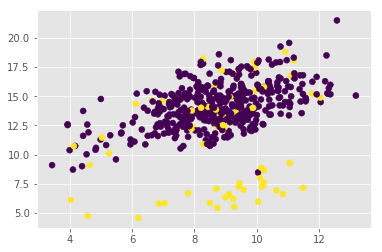

In [99]:
plt.scatter(data1['distance_to_customer_KM'], data1['delivery_fee'], c = data1['customerHasloyalty'])
plt.show()

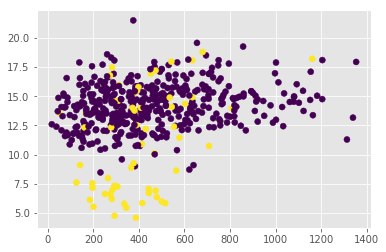

In [100]:
plt.scatter(data1['order_price'], data1['delivery_fee'],  c = data1['customerHasloyalty'])
plt.show()

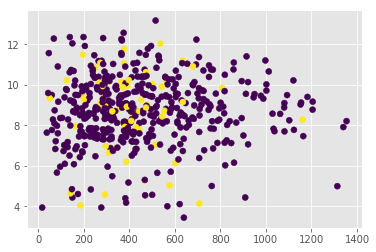

In [101]:
plt.scatter(data1['order_price'], data1['distance_to_customer_KM'],  c = data1['customerHasloyalty'])
plt.show()